In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session





# Explanatory Data Analysis (EDA) 

Shape of the dataset: (1786, 3)
Columns: ['headline', 'summary', 'article']
headline    0
summary     0
article     0
dtype: int64
                                            headline  \
0                    তুরস্কে সুইডেনের দূতাবাসে হামলা   
1  ডেঙ্গুতে আক্রান্তদের চিকিৎসার দায়িত্ব নিলেন সা...   
2   সুনামগঞ্জে আওয়ামী লীগের উদ্যোগে রক্তদান কর্মসূচি   
3  সরকারবিরোধী ষড়যন্ত্র করে লাভ হবে না: পানিসম্পদ...   
4                     নতুন কর্মসূচি ঘোষণা করলো ১৪ দল   

                                             summary  \
0  তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...   
1  সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ রূ...   
2  শোকাবহ আগস্টের প্রথম দিনে সুনামগঞ্জে স্বেচ্ছায়...   
3  পানিসম্পদ উপমন্ত্রী একেএম এনামুল হক শামীম বলেছ...   
4  বিএনপির ‌‘অগ্নিসন্ত্রাস ও নৈরাজ্য সৃষ্টির প্রত...   

                                             article  
0  তুরস্কের পশ্চিমাঞ্চলীয় ইজমির প্রদেশে সুইডেনের ...  
1  সারাদেশে ডেঙ্গু পরিস্থিতি দিন দিন আরও ভয়াবহ রূ...  
2  শোকাবহ আগস্টের প্রথম দিনে স

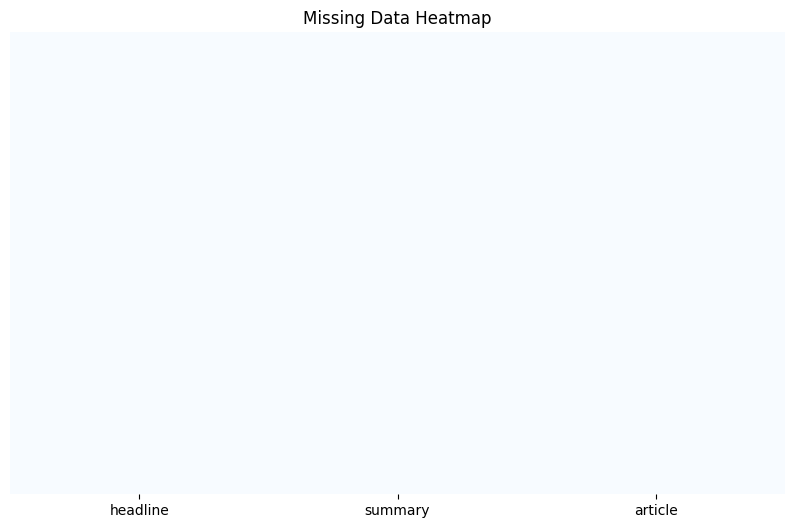

In [2]:
#inspect the structure, missing values, and basic statistics of the data to ensure quality.

# Load the dataset
import pandas as pd

data = pd.read_csv('/kaggle/input/bangla-news-sum/News From 2023-08-01 To 2023-08-16.csv')

# Basic data inspection
print(f"Shape of the dataset: {data.shape}")
print(f"Columns: {data.columns.tolist()}")

# Summary of missing values
print(data.isnull().sum())

# Show a sample of the data
print(data.head())

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='Blues', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


Dataset shape: (1786, 9)
Columns: ['headline', 'summary', 'article', 'article_word_count', 'summary_word_count', 'headline_word_count', 'article_char_count', 'summary_char_count', 'headline_char_count']
Missing values:
headline               0
summary                0
article                0
article_word_count     0
summary_word_count     0
headline_word_count    0
article_char_count     0
summary_char_count     0
headline_char_count    0
dtype: int64


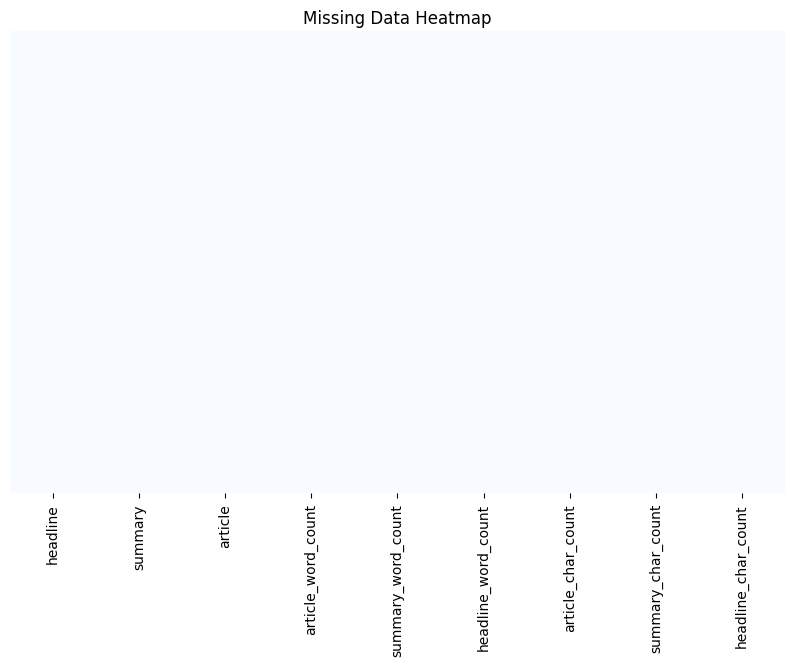

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   headline             1786 non-null   object
 1   summary              1786 non-null   object
 2   article              1786 non-null   object
 3   article_word_count   1786 non-null   int64 
 4   summary_word_count   1786 non-null   int64 
 5   headline_word_count  1786 non-null   int64 
 6   article_char_count   1786 non-null   int64 
 7   summary_char_count   1786 non-null   int64 
 8   headline_char_count  1786 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 125.7+ KB
None
                                              headline  \
303  বঙ্গবন্ধুকে হত্যা করে ঘাতকেরা জাতিকে অভিভাবক শ...   
929                           কে এই অনন্ত জলিলের নায়ক?   
728           দেশজুড়ে বৃষ্টির আভাস, চার বন্দরে সতর্কতা   
848     শুটিং-এ আহত হয়েছেন হলিউড অভিনেত্রী রেবেল উইলসন   
273     

In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

# General overview
print(f"Dataset shape: {data.shape}")
print(f"Columns: {data.columns.tolist()}")

# Check for missing values
missing_data = data.isnull().sum()
print(f"Missing values:\n{missing_data}")

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='Blues', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# Show data types and a few samples
print(data.info())
print(data.sample(5))  # Preview a sample of 5 rows


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


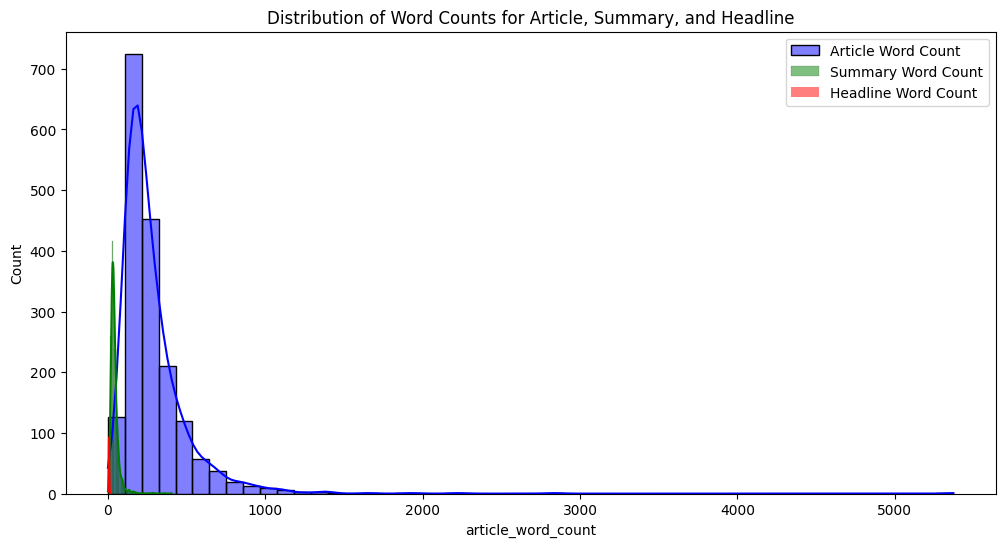

In [6]:
# Adding length columns for article, summary, and headline (in words and characters)
data['article_word_count'] = data['article'].apply(lambda x: len(str(x).split()))
data['summary_word_count'] = data['summary'].apply(lambda x: len(str(x).split()))
data['headline_word_count'] = data['headline'].apply(lambda x: len(str(x).split()))

data['article_char_count'] = data['article'].apply(lambda x: len(str(x)))
data['summary_char_count'] = data['summary'].apply(lambda x: len(str(x)))
data['headline_char_count'] = data['headline'].apply(lambda x: len(str(x)))

# Visualizing word count distributions for article, summary, and headline
plt.figure(figsize=(12,6))
sns.histplot(data['article_word_count'], kde=True, bins=50, color='blue', label='Article Word Count')
sns.histplot(data['summary_word_count'], kde=True, bins=50, color='green', label='Summary Word Count')
sns.histplot(data['headline_word_count'], kde=True, bins=50, color='red', label='Headline Word Count')
plt.legend()
plt.title('Distribution of Word Counts for Article, Summary, and Headline')
plt.show()


Number of outliers in articles: 18
Number of outliers in article word counts: 18


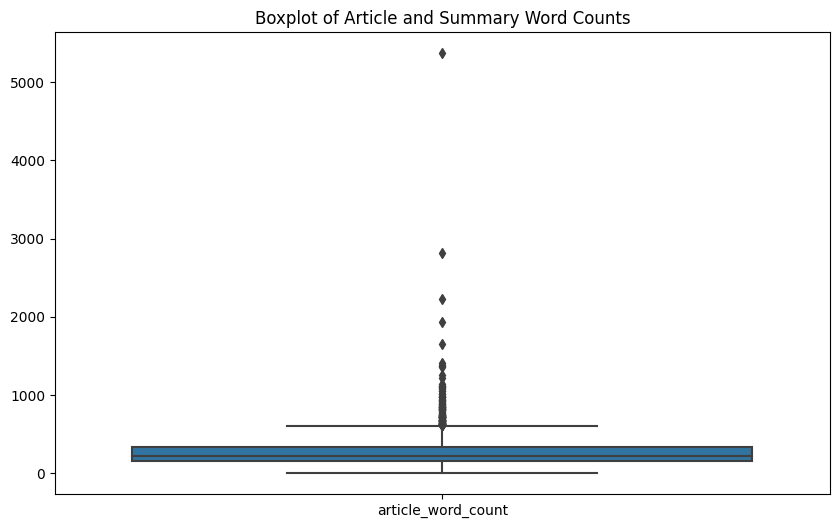

In [8]:
# Detecting articles with unusually long word counts (e.g., top 1%)
outliers = data[data['article_word_count'] > data['article_word_count'].quantile(0.99)]
print(f"Number of outliers in articles: {len(outliers)}")

# Display the number of outliers
print(f"Number of outliers in article word counts: {len(outliers)}")

# Visualize outliers using boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=data[['article_word_count']])
plt.title('Boxplot of Article and Summary Word Counts')
plt.show()

